In [59]:
import pandas as pd
import numpy as np
import plotly
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)
%matplotlib inline

In [80]:
Path = 'FI_Data.csv'#_Filled.csv
df = pd.read_csv(Path,delimiter = ',',header = 0)
df = df.set_index(pd.DatetimeIndex(df.datetime))
Data = df.drop(df.columns[0],axis=1)
Daily = Data.groupby(Data.index.dayofyear).mean()
Daily[['PPFD','Rain']] = Data[['PPFD_Avg','Rain_mm_Tot']].groupby(Data.index.dayofyear).sum()

<Container object of 86 artists>

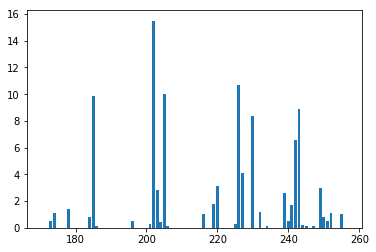

In [92]:
plt.figure()
plt.bar(Daily.index,Daily['Rain']/10)#.cumsum()/10)


# from plotly.graph_objs import Scatter, Figure, Layout

# plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])



In [104]:
fig = tools.make_subplots(rows=2, cols=2,subplot_titles=('Air Temperature', 'Photon Flux Density',
                                                         'Ground Temps','Water Table & Precip'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 2)


fig['layout']['xaxis1'].update( range=[174, 256])
fig['layout']['xaxis3'].update(title='Day of Year', range=[174, 256])
fig['layout']['yaxis1'].update(title='Degrees C',range=[-5,30])
fig['layout']['yaxis2'].update(title='mmol m<sup>-2</sup> m<sup>-d</sup>', range=[0, 35])
fig['layout']['yaxis3'].update(title='Ground Temps', range=[0, 11])
fig['layout']['yaxis4'].update(title='depth cm', range=[-20, 0])
fig['layout']['yaxis8'].update(title='rainfall cm', range=[0, 1.6])
fig['layout'].update(showlegend=False, title='Climate Conditions')



# In this example, I am only doing it for the last subplot, but if you wanted to do if for all, 
# Just change to range(1,5)

for k in range(4,5):  
    fig['layout'].update({'yaxis{}'.format(k+4): dict(anchor='x'+str(k),
                                                          overlaying='y'+str(k),
                                                          side='right',
                                                         )
                            })

trace1 = go.Scatter(
        y=Daily['AirTC_Avg'],
        x=Daily.index,
        marker = dict(
        size = 10,
        color = 'rgba(160, 0, 0, .8)',),
        error_y=dict(
            type='data',
            array=Daily_Max['AirTC_Avg']-Daily_Min['AirTC_Avg'],
            visible=True,
        color = 'rgba(100, 0, 0, .5)',
        ),
    name = 'Air Temp'
    )

trace2 = go.Bar(
        y=Daily['PPFD']/1000,
        x=Daily.index,
        name='Photon Flux',
        marker=dict(
            color='rgb(180, 180, 0)'
        ),
    
    yaxis='y2',
)

trace3 = go.Scatter(
        y=Daily['Temp_2_5_1'],
        x=Daily.index,
        name='Soil Temp',
        marker=dict(
            color='rgb(180, 0, 0)'
        ),
    
    yaxis='y3',
)


trace4 = go.Scatter(
        y=Daily['Table_1']*100,
        x=Daily.index,
        name='Water Table',
        marker=dict(
            color='rgb(0, 0, 180)'
        ),
    
    yaxis='y4',
)

trace5 = go.Bar(
        y=Daily['Rain']/10,
        x=Daily.index,
        name='Rain',
        marker=dict(
            color='rgb(0, 100, 180)'
        ),
    
    yaxis='y8',
)
    
    
## This part is important!!! you have to manually assing the data to the axis even 
# though you do it when defining trace 5
fig['data'][4].update(yaxis='y'+str(8))
plot(fig, filename='FI_Climate')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



C:\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `FI_Climate` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\wesle\\FishIsland_Processing\\FI_Climate.html'

In [ ]:
data = [go.Scatter(
        y=Daily['AirTC_Avg'],
        x=Daily.index,
        marker = dict(
        size = 10,
        color = 'rgba(160, 0, 0, .8)',),
        error_y=dict(
            type='data',
            array=Daily_Max['AirTC_Avg']-Daily_Min['AirTC_Avg'],
            visible=True,
        color = 'rgba(100, 0, 0, .5)',
        ),
    name = 'Daily Range'
    )]#,
#     go.Scatter(
#         x=X,
#         y=Y3,
#         error_y=dict(
#             type='data',
#             array=y_s3,
#             visible=True
#         ),
#         name='Transition'
#     ),
#     go.Scatter(
#         x=X,
#         y=Y,
#         error_y=dict(
#             type='data',
#             array=y_s,
#             visible=True
#         ),
#         name='Center'
#     )
# ]
layout = dict(title = 'Air Temperatures at Fish Island',
              xaxis = dict(title = 'Day of Year'),
              yaxis = dict(title = 'Temperature (degrees C)'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='FI_AirTemps')

In [ ]:
bins = np.arange(0,360.1,45)
Data['Dir'] = pd.cut(Data['wind_dir'],bins=bins,labels = (bins[0:-1]+bins[1:])/2)

def WindG(Data,r,qt,color,name,LastGroup=None):
#     Q0 = Data[r].quantile(qt[0])
#     Q1 = Data[r].quantile(qt[1])
#     Temp = Data.loc[(Data[r]<=Q1) & (Data[r]>=Q0)] ## For Quantile Plots
    Temp = Data.loc[(Data[r]<=qt[1]) & (Data[r]>=qt[0])] ## For categories Plots
    WindGroups = Temp.groupby(Temp['Dir']).count()/(Data.groupby(Data['Dir']).count()*0+1)/Data.count()*100
    WindGroups.loc[WindGroups[r]==np.nan] = 0
    try:
        WindGroups += LastGroup
    except:
        pass
    trace = go.Area(
        r=WindGroups[r],
        t=WindGroups.index,#-(WindGroups.index[0]-WindGroups.index[1])/2,
        name=name,
        marker=dict(
            color=color
        )
    )
    return(trace,WindGroups)
r = 'wind_speed'
colors = ['rgb(150,200,250)','rgb(100,150,250)','rgb(50,100,250)','rgb(0,50,250)']
trace1,Last = WindG(Data,r,[0,1],colors[0],'0-1')
trace2,Last = WindG(Data,r,[1,2],colors[1],'1-2',Last)
trace3,Last = WindG(Data,r,[2,3],colors[2],'2-3',Last)
trace4,Last = WindG(Data,r,[3,100],colors[3],'>3',Last)

data = [trace4, trace3, trace2, trace1]
layout = go.Layout(
    title='Wind Rose - Fish Island',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='polar-area-chart2')

In [ ]:
import plotly.figure_factory as ff
hist_data = [Data['co2_flux'].dropna()]
group_labels = ['CO<sub>2</sub> Fluxes']
colors=['rgb(0,250,100)']
f1 = ff.create_distplot(hist_data, group_labels,colors=colors,bin_size = .1)

hist_data = [Data['ch4_flux'].dropna()]
group_labels = ['CH<sub>4</sub> Fluxes']
colors=['rgb(250,0,100)']
f2 = ff.create_distplot(hist_data, group_labels,colors=colors,bin_size = .001)

# fig = tools.make_subplots(rows=1, cols=2)

# fig.append_trace(f1, 1, 1)
# fig.append_trace(f2, 1, 2)
# py.iplot(f1, filename='Basic Distplot')

distplot1=f1['data']
distplot2=f2['data']
for item in distplot1:
    item.pop('xaxis', None)
    item.pop('yaxis', None)
for item in distplot2:
    item.pop('xaxis', None)
    item.pop('yaxis', None)
my_fig = tools.make_subplots( subplot_titles=('Title1', 'Title2'),
#   specs=[[{}, {'rowspan': 2}], #rowspan=2 means that we  concatenate  (1,2) with (2,2) into one cell encoded (1,2) 
#          [{},  None]],                       
    rows=2,
    cols=2
    )
my_fig.append_trace(distplot1[0], 1, 1)
my_fig.append_trace(distplot1[1], 1, 1)
my_fig.append_trace(distplot1[2], 2, 1)
my_fig.append_trace(distplot2[0], 1, 2)
my_fig.append_trace(distplot2[1], 1, 2)
my_fig.append_trace(distplot2[2], 2, 2)

py.iplot(my_fig, filename='Dual Distplot')

In [ ]:
Roll = pd.rolling(Daily, window=7, min_periods=1).mean()
Roll_Max = pd.rolling(Daily_Max, window=7, min_periods=1).max()
Roll_Min = pd.rolling(Daily_Min, window=7, min_periods=1).min()

In [ ]:
data = [go.Scatter(
        y=Roll['co2_flux'],
        x=Roll.index,
        marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )),
        error_y=dict(
            type='data',
            array=Daily_Max['co2_flux']-Daily_Min['co2_flux'],
            visible=True
        ),
    name = 'Weekly Range'
    )]#,
#     go.Scatter(
#         x=X,
#         y=Y3,
#         error_y=dict(
#             type='data',
#             array=y_s3,
#             visible=True
#         ),
#         name='Transition'
#     ),
#     go.Scatter(
#         x=X,
#         y=Y,
#         error_y=dict(
#             type='data',
#             array=y_s,
#             visible=True
#         ),
#         name='Center'
#     )
# ]
layout = dict(title = 'CO<sub>2</sub> at Fish Island',
              xaxis = dict(title = 'Day of Year'),
              yaxis = dict(title = 'Temperature (degrees C)'),
              )

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='FI_AirTemps')